In [1]:
import pandas as pd
import numpy as np
# import matplotlib

from sklearn.model_selection import train_test_split



# 유방암 데이터
## 분류
### 이진분류 Class 0 : 정상 1 : 유방암

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv',encoding='utf-8') # encoding='utf-8'
df.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [3]:
df['Class'].value_counts(sort=False)

0    444
1    239
Name: Class, dtype: int64

In [4]:
df.shape

(683, 11)

In [5]:
X1 = df[df.columns[1:10]]

In [6]:
X1.shape

(683, 9)

In [7]:
y = df[['Class']]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [8]:
y.shape

(683, 1)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,stratify=y,random_state=42)

In [10]:
y_train.mean()

Class    0.349609
dtype: float64

In [11]:
y_test.mean()

Class    0.350877
dtype: float64

### 정규화

#### MinMax or Standard

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

#### MinMax

In [13]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Standard

In [14]:
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


#### Test Data 정규화

In [15]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
X_scaled_standard_test = scaler_standard.transform(X_test)

print(pd.DataFrame(X_scaled_minmax_test).describe())
print(pd.DataFrame(X_scaled_standard_test).describe())

                0           1           2           3           4           5  \
count  171.000000  171.000000  171.000000  171.000000  171.000000  171.000000   
mean     0.411306    0.259909    0.256010    0.198181    0.269006    0.274204   
std      0.298847    0.357544    0.332700    0.315307    0.259557    0.405891   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.222222    0.000000    0.000000    0.000000    0.111111    0.000000   
50%      0.444444    0.000000    0.111111    0.000000    0.111111    0.000000   
75%      0.555556    0.444444    0.444444    0.222222    0.388889    0.444444   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  171.000000  171.000000  171.000000  
mean     0.278752    0.233918    0.065627  
std      0.292578    0.360958    0.199372  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

#### 모델 학습

In [30]:
# from sklearn.linear_model

import sklearn

sklearn.__all__

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

In [29]:
import sklearn.linear_model
sklearn.linear_model.__all__


['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'enet_path',
 'lars_path',
 'lars_path_gram',
 'lasso_path',
 'orthogonal_mp',
 'orthogonal_mp_gram',
 'ridge_regression',
 'RANSACRegressor',
 'PoissonRegressor',
 'GammaRegressor',
 'TweedieRegressor']

In [18]:
# from sklearn.linear_model import LogisticRegression

In [19]:
# ML 알고리즘 모듈 불러오기 및 학습데이터에 적용(LogisticRegression)
# 여기서는 min-max 정규화 데이터로 분석
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

H:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [20]:
help(model)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [21]:
# 분류 예측 결과(0,1)을 'pred_train'에 저장(할당), score로 정확도(accuracy) 확인
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

In [22]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.9590643274853801

In [23]:
xx = pred_train

In [24]:
yy = y_train.to_numpy().reshape(-1,len(y_train)).flatten()

In [25]:
cnt = 0
for a,b in zip(xx,yy):
    
    if a==b:
        cnt += 1
    
print(len(xx))
cnt

512


498

In [26]:
stanmodel = LogisticRegression()
stanmodel.fit(X_scaled_standard_train,y_train)

H:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [27]:
stanpred_train = stanmodel.predict(X_scaled_standard_train)
stanmodel.score(X_scaled_standard_train,y_train)

0.9765625

In [28]:
stanpred_test = model.predict(X_scaled_standard_test)
stanmodel.score(X_scaled_standard_test,y_test)

0.9590643274853801

In [31]:
import sklearn.metrics

sklearn.metrics.__all__

['accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'ConfusionMatrixDisplay',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'dcg_score',
 'davies_bouldin_score',
 'DetCurveDisplay',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'nan_euclidean_distances',
 'matthews_corrcoef',
 'max_error',
 'mean_absolute_error',
 'mean_squared_error',
 'mean_squared_log_error',
 'mean_poisson_deviance',
 'mean_gamma_deviance',
 'mean_tweedie_deviance',
 'median_absolute_error',
 'mea

In [32]:
from sklearn.metrics import confusion_matrix

help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [34]:
confusion_matrix(y_train,pred_train)

array([[328,   5],
       [  9, 170]], dtype=int64)

In [35]:
confusion_matrix(y_test,pred_test)

array([[106,   5],
       [  2,  58]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

cfreport_train = classification_report(y_train,pred_train)
print(cfreport_train)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [38]:
from sklearn.metrics import roc_curve,auc,plot_roc_curve

help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

In [48]:
fpr,tpr,thresholds = roc_curve(y_test,model.decision_function(X_scaled_minmax_test))

In [41]:
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model._base:

decision_function(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is proportional to the signed
    distance of that sample to the hyperplane.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [49]:
fpr

array([0.        , 0.        , 0.        , 0.00900901, 0.00900901,
       0.02702703, 0.02702703, 0.03603604, 0.03603604, 0.04504505,
       0.04504505, 0.17117117, 0.18918919, 0.23423423, 0.25225225,
       0.27027027, 0.2972973 , 0.30630631, 0.32432432, 0.33333333,
       0.35135135, 0.36036036, 0.37837838, 0.3963964 , 0.43243243,
       0.45045045, 0.47747748, 0.52252252, 0.54954955, 0.55855856,
       0.57657658, 0.58558559, 0.62162162, 0.63963964, 0.69369369,
       0.73873874, 0.77477477, 0.79279279, 0.8018018 , 0.82882883,
       0.86486486, 0.89189189, 0.92792793, 0.99099099, 1.        ])

In [50]:
tpr

array([0.        , 0.01666667, 0.65      , 0.65      , 0.85      ,
       0.85      , 0.86666667, 0.86666667, 0.93333333, 0.93333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [51]:
thresholds

array([10.4217636 ,  9.4217636 ,  3.71477721,  3.61100144,  2.62670121,
        2.53289784,  2.46138844,  2.44113547,  0.73519644,  0.66185833,
       -0.93964994, -3.08254909, -3.08284888, -3.30320519, -3.36001135,
       -3.36449557, -3.38098512, -3.39917764, -3.45498728, -3.47796175,
       -3.5070115 , -3.51428863, -3.51593146, -3.60398813, -3.64195784,
       -3.67185157, -3.79787795, -3.92226149, -3.92390432, -3.92868833,
       -3.95379806, -3.95544088, -4.07982443, -4.08221644, -4.20585081,
       -4.23574454, -4.36012809, -4.36177092, -4.36416292, -4.36590894,
       -4.48779729, -4.51769102, -4.76810095, -4.79963751, -4.92402106])

In [46]:
model.decision_function(X_scaled_minmax_test)

array([-3.0760328 , -3.5070115 , -2.81670291, -3.8601789 ,  6.64021571,
        2.94982365, -4.51769102, -3.64195784, -3.45498728, -4.23738737,
        4.60444336, -3.36001135, -3.30320519, -4.15381492, -3.95379806,
       -3.14314707, -2.8612761 , -3.39917764,  5.54065588, -3.36449557,
       -4.79963751,  6.41159572, -3.92390432,  6.39426077, -3.07806487,
        8.17065394, -3.58101366,  4.61154331, -4.36416292, -3.47796175,
       -4.33426919,  0.338151  ,  6.52750588,  4.94751124, -3.95544088,
       -4.23574454, -4.48779729, -3.67185157,  3.01609716, -3.92390432,
        4.07381301,  3.87251891,  1.55575764, -4.07982443, -3.67185157,
       -2.1997505 , -4.79963751, -3.64195784, -4.48779729, -3.60398813,
        3.43637204,  7.65434997, -4.20420798,  2.56526887,  4.39599283,
       -3.51593146, -4.07982443, -4.33437238,  1.04352594,  3.4593118 ,
        2.53289784, -3.08254909, -2.58107563,  2.44113547, -3.08220289,
        4.38899225, -3.79787795, -4.23574454,  3.71477721, -4.23

In [47]:
X_scaled_minmax_test

array([[0.44444444, 0.11111111, 0.11111111, ..., 0.11111111, 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.22222222, 0.11111111,
        0.        ],
       [0.44444444, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.        ],
       ...,
       [0.66666667, 0.33333333, 0.55555556, ..., 0.33333333, 0.22222222,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ]])

In [63]:
model.predict_proba(X_scaled_minmax_test)[:,1]

array([0.04410678, 0.02911339, 0.05642823, 0.02062968, 0.99869496,
       0.95025515, 0.01079636, 0.02553203, 0.03062048, 0.01423959,
       0.99009188, 0.03356885, 0.0354614 , 0.01546158, 0.0188207 ,
       0.04136215, 0.05410136, 0.03232118, 0.99609138, 0.03342368,
       0.00816551, 0.99836029, 0.01938074, 0.99833167, 0.04402118,
       0.99971725, 0.02709299, 0.99016129, 0.0125654 , 0.02994583,
       0.01294177, 0.58374131, 0.99853949, 0.99294901, 0.01879038,
       0.01426267, 0.01112033, 0.02479873, 0.95329607, 0.01938074,
       0.98327218, 0.97961817, 0.82574376, 0.01662923, 0.02479873,
       0.0997729 , 0.00816551, 0.02553203, 0.01112033, 0.02649394,
       0.96882212, 0.99952625, 0.01471291, 0.92859262, 0.98782346,
       0.02886232, 0.01662923, 0.01294045, 0.73952977, 0.96950763,
       0.92641614, 0.04383285, 0.07036634, 0.91991078, 0.04384737,
       0.98773897, 0.02192673, 0.01426267, 0.97621847, 0.01426267,
       0.03289504, 0.98971364, 0.05259614, 0.03824762, 0.06990

In [65]:
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_scaled_minmax_test)[:,1])

In [66]:
fpr

array([0.        , 0.        , 0.        , 0.00900901, 0.00900901,
       0.02702703, 0.02702703, 0.03603604, 0.03603604, 0.04504505,
       0.04504505, 0.17117117, 0.18918919, 0.23423423, 0.25225225,
       0.27027027, 0.2972973 , 0.30630631, 0.32432432, 0.33333333,
       0.35135135, 0.36036036, 0.37837838, 0.3963964 , 0.43243243,
       0.45045045, 0.47747748, 0.52252252, 0.54954955, 0.55855856,
       0.57657658, 0.58558559, 0.62162162, 0.63963964, 0.69369369,
       0.73873874, 0.77477477, 0.79279279, 0.8018018 , 0.82882883,
       0.86486486, 0.89189189, 0.92792793, 0.99099099, 1.        ])

In [68]:
tpr

array([0.        , 0.01666667, 0.65      , 0.65      , 0.85      ,
       0.85      , 0.86666667, 0.86666667, 0.93333333, 0.93333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [69]:
thresholds

array([1.99991906, 0.99991906, 0.97621847, 0.97368635, 0.93256038,
       0.92641614, 0.92139029, 0.91991078, 0.67594456, 0.65967771,
       0.28097106, 0.04383285, 0.04382029, 0.0354614 , 0.03356885,
       0.03342368, 0.03289504, 0.03232118, 0.03062048, 0.02994583,
       0.02911339, 0.0289084 , 0.02886232, 0.02649394, 0.02553203,
       0.02479873, 0.02192673, 0.01941199, 0.01938074, 0.01929003,
       0.0188207 , 0.01879038, 0.01662923, 0.01659016, 0.01468911,
       0.01426267, 0.01261557, 0.01259512, 0.0125654 , 0.01254376,
       0.01112033, 0.01079636, 0.00842492, 0.00816551, 0.00721737])

In [71]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))

In [72]:
roc_auc

0.9923423423423423

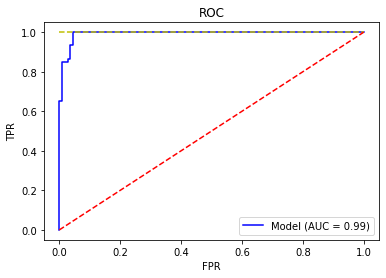

In [78]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr,tpr,'b',label=f'Model (AUC = {roc_auc:.2f})')
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()



In [95]:
print(pd.DataFrame(pred_train).shape)
print(y_train.shape)

(512, 1)
(512, 1)


In [97]:
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train['y_pred']=pred_train
y_train[['y_prob0','y_prob1']]=prob_train
y_train

H:\ProgramData\Anaconda3\envs\AI\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [98]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test['y_pred']=pred_test
y_test[['y_prob0','y_prob1']]=prob_test
y_test

H:\ProgramData\Anaconda3\envs\AI\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [99]:
Total_test=pd.concat([X_test,y_test],axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [100]:
Total_test.to_csv('1201classification_test.csv')